# Estimation of Turbulent Flow Using Physics-Informed Neural Networks (PINNs):  
## Modeling of Velocity Fields Around Periodic Hills with PirateNET  

**Author:** Gökay Akçay  
**Student Number:** 090200147  
**University:** Istanbul Technical University  
**Supervisor:** Prof. Dr. Emre Onur Kahya  

---

### Abstract  
This study investigates the potential of Physics-Informed Neural Networks (PINNs) for estimating turbulent flow and modeling velocity fields around periodic hills. By integrating physical laws into the network’s loss function, the framework leverages the governing equations of fluid mechanics to achieve highly accurate predictions. PirateNET is employed for efficient simulation and visualization of velocity fields in this complex flow topology.

---

### Introduction  
Turbulent flow estimation is a challenging problem in fluid dynamics, particularly for complex geometries such as periodic hills. Conventional numerical methods like Computational Fluid Dynamics (CFD) are computationally expensive and time-intensive. Physics-Informed Neural Networks (PINNs) offer an alternative approach by embedding physical constraints directly into the learning process. This study aims to validate PINNs for modeling turbulent flows and apply the framework to predict velocity fields around periodic hills.

In [22]:
import os
print(os.getcwd())

C:\Users\Gokay\Physics Informed Neural Networks\Term Project\Turbulance Models


In [23]:
import numpy as np
import pandas as pd
from pathlib import Path

### Loading and Extracting Variables from the Turbulence Dataset

### Overview
This script is designed to handle the loading and processing of data from a turbulence modeling dataset. It includes functionality for:

1. **Combining Flow Data**: Concatenates flow variable data from multiple cases.
2. **Loading Label Data**: Retrieves labeled data associated with flow cases.
3. **Extracting Variable Keys**: Extracts unique flow and label variable names from dataset files.

In [24]:
DATASET_NAME = 'kepsilon'
DATASET_BASE_PATH = Path(r'C:\Users\Gokay\Physics Informed Neural Networks\Term Project\Turbulance Models\Dataset')

In [25]:
def get_flow_and_label_variable_keys(DATASET_BASE_PATH, DATASET_NAME):
    """
    This method extracts and returns the keys (variable names) for both flow variables and label variables 
    from the dataset and labels directories.
    
    Parameters:
        DATASET_BASE_PATH (Path): The base path for the dataset.
        DATASET_NAME (str): The name of the dataset (used in the filenames).

    Returns:
        flow_variables (list): List of flow variable names (e.g., "Ux", "Uy", "p").
        label_variables (list): List of label variable names (e.g., "uv", "uu", "vv").
    """
    # Set the base directory paths for the dataset and label directory
    dataset_directory = DATASET_BASE_PATH / DATASET_NAME
    label_directory = DATASET_BASE_PATH / 'labels'
    
    # List all files in the dataset directory
    dataset_files = os.listdir(dataset_directory)
    
    # Extract flow variable names from files in the dataset directory (excluding 'labels' folder)
    flow_variables = [
        file.split('_')[1] for file in dataset_files if file.endswith('.npy') and 'label' not in file
    ]
    
    # List all files in the label directory
    label_files = os.listdir(label_directory)
    
    # Extract label variable names from the 'labels' directory
    label_variables = [
        file.split('_')[1] for file in label_files if file.endswith('.npy')
    ]
    
    unique_flow_variables = list(set(flow_variables))
    unique_label_variables = list(set(label_variables))
    
    # Return the unique flow and label variables as a tuple
    return unique_flow_variables, unique_label_variables

In [26]:
def load_combined_array(cases, field):
    """
    Combines and loads flow variable data from multiple cases into a single NumPy array.

    Parameters:
        cases (list): A list of case names to load data from.
        field (str): The name of the field variable (e.g., "Ux", "Uy", "p").

    Returns:
        numpy.ndarray: A concatenated array of the specified field data across the given cases.
    """
    # Concatenate data from all specified cases for the given field
    data = np.concatenate(
        [
            # Load the .npy file for each case and field
            np.load(
                DATASET_BASE_PATH
                / DATASET_NAME
                / (DATASET_NAME + "_" + case + "_" + field + ".npy")
            )
            for case in cases  # Iterate over each case
        ]
    )
    return data


def load_label_data(cases, field):
    """
    Combines and loads labeled data from multiple cases into a single NumPy array.

    Parameters:
        cases (list): A list of case names to load label data from.
        field (str): The name of the label variable (e.g., "uv", "uu", "vv").

    Returns:
        numpy.ndarray: A concatenated array of the specified label data across the given cases.
    """
    # Concatenate label data from all specified cases for the given field
    data = np.concatenate(
        [
            # Load the .npy file for each case and label field from the 'labels' directory
            np.load(
                DATASET_BASE_PATH
                / 'labels'  # Navigate to the 'labels' subdirectory
                / (case + "_" + field + ".npy")
            )
            for case in cases  # Iterate over each case
        ]
    )
    return data


In [27]:
flow_variables, label_variables = get_flow_and_label_variable_keys(DATASET_BASE_PATH, DATASET_NAME)

In [28]:
cases = ["PHLL_case_1p0"]
x = load_combined_array(cases, "Cx")
y = load_combined_array(cases, "Cy")

flow_variables = ["Ux", "Uy", "p"]
flow_variables_arrays = [
    load_combined_array(cases, variable) for variable in flow_variables
]

label_variables = ['uv', 'uu', 'vv']
label_arrays = [
    load_label_data(cases, variable) for variable in label_variables
]

flow_variables_arrays = flow_variables_arrays + label_arrays

### Visualizing the Dataset: Average Velocity and Pressure Distribution on a Mesh


In [29]:
import matplotlib.pyplot as plt

In [30]:
def plot_mesh(x, y):
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    ax.scatter(x, y, c='k', s=0.1)
    ax.set_title('Mesh')
    ax.set_aspect(1)

In [31]:
def plot_flow_variables(x, y, *variables):
    n_variables = len(variables)
    fig, ax = plt.subplots(3, 2, figsize=(18, 12))  # 2 rows and 3 columns
    
    # Flatten the axes array for easy indexing
    ax = ax.flatten()

    # Define the list of variable names (these should match the variables you are passing)
    variable_names = flow_variables + label_variables  # Update this list as needed

    for i, variable in enumerate(variables):
        # Dynamically set the title to the corresponding variable name
        ax[i].set_title(variable_names[i])
        
        # Plot the contour plot
        contour = ax[i].tricontourf(x.flatten(), y.flatten(), variable.flatten(), levels=50)
        
        # Maintain aspect ratio
        ax[i].set_aspect(1)
        
        # Add a colorbar for each subplot
        fig.colorbar(contour, ax=ax[i])
    
    # Show the plot
    plt.tight_layout()  # To ensure that the subplots do not overlap
    plt.show()


In [32]:
x

array([8.95455  , 8.86364  , 8.77273  , ..., 0.227445 , 0.136411 ,
       0.0454619])

In [33]:
np.asarray(flow_variables_arrays).shape

(6, 14751)

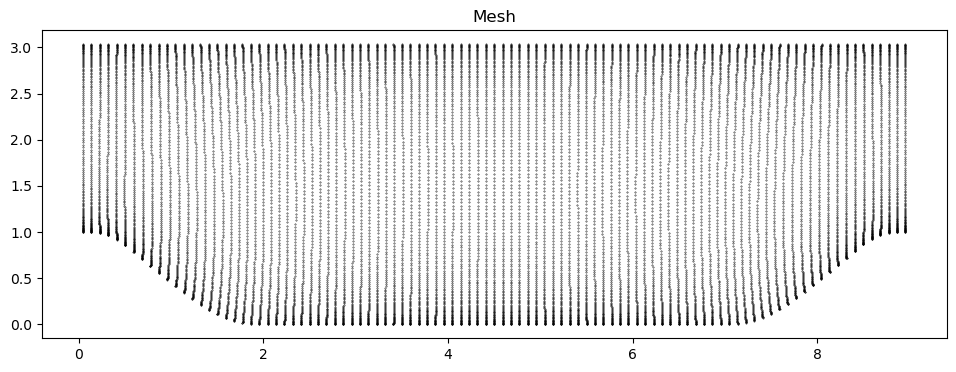

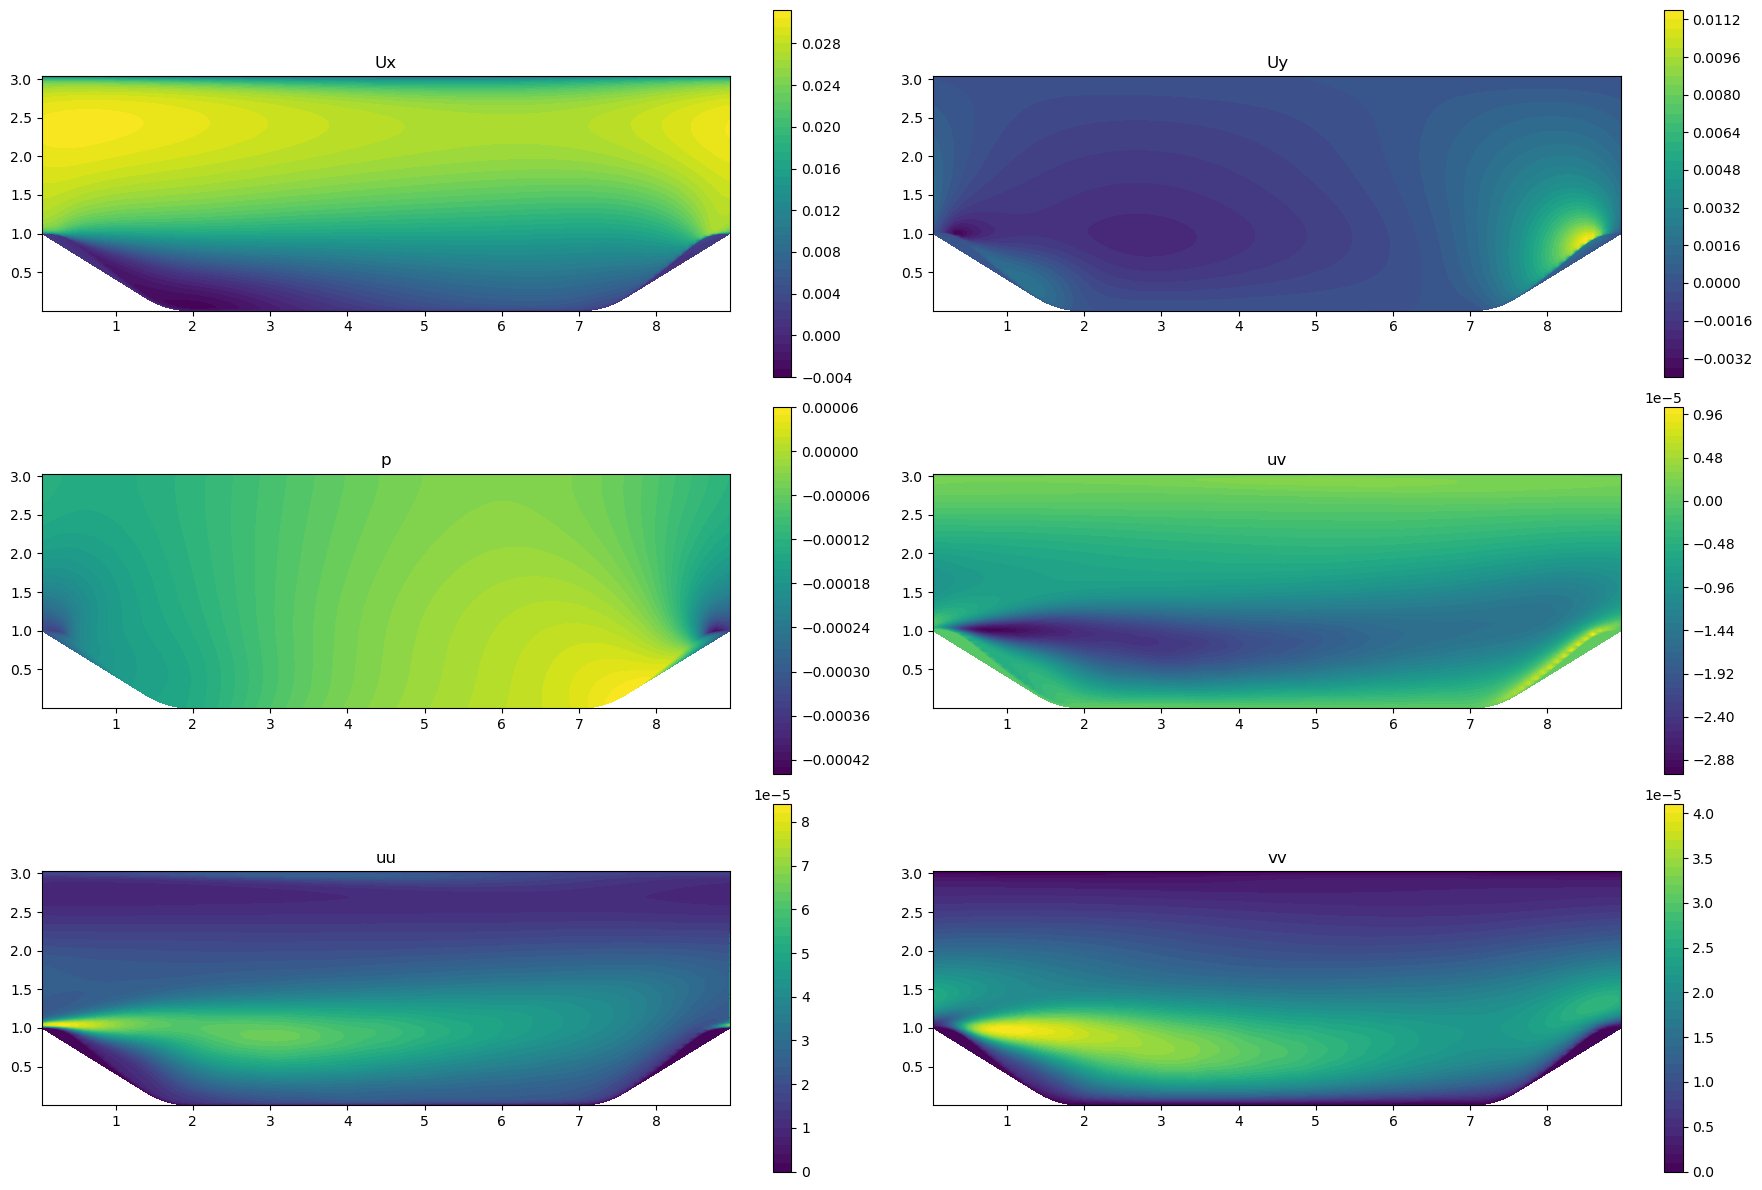

In [34]:
plot_mesh(x, y)
plot_flow_variables(x, y, *flow_variables_arrays)

### Setting Up the Physics-Informed Neural Networks (PINNs) for Fluid Dynamics

In this section, we set up **Physics-Informed Neural Networks (PINNs)** to solve fluid dynamics problems governed by the Navier-Stokes equations. The process involves:

1. **PDE Loss Function**: A custom loss function, `pde_loss`, is designed to calculate the residuals of the Navier-Stokes equations by leveraging velocity (`u`, `v`) and pressure (`p`) predictions. It computes gradients and incorporates Reynolds stresses.
  
2. **Neural Network Architecture**: 
   - The `Net` class implements a fully connected feed-forward neural network with multiple layers.
   - The **PirateNet** class introduces a more advanced architecture with adaptive blending between velocity components (`u`, `v`) using a combination of `PirateNetBlock`s to enhance fluid dynamics predictions.

3. **Forward Pass & Weight Initialization**: The model applies **Xavier initialization** to network weights and uses an embedding method to process input data. The forward pass computes the fluid variables by passing input through the network layers.

By combining physical constraints and data-driven learning, the network aims to accurately model fluid flow and pressure dynamics.


In [35]:
import os
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd

from sklearn.preprocessing import StandardScaler

### Sampling Collocation Points & Preprocessing-Training Data

In this section of the project, we define a function get_collocation_points to sample a fixed number of collocation points from the training dataset. These collocation points are critical for training physics-informed neural networks (PINNs), as they are used to enforce the governing equations during training. Here's a breakdown of the function:

In [36]:
def get_collocation_points(x_train, y_train, n_points=7000):
    idx = np.random.choice(x_train.shape[0], n_points, replace=False)
    x_train = torch.tensor(x_train[idx, :], dtype=torch.float32)
    y_train = torch.tensor(y_train[idx, :], dtype=torch.float32)
    return x_train, y_train

In [37]:
x_train = np.stack((x, y), axis=1)
y_train = np.stack((flow_variables_arrays), axis=1)
print(x_train.shape, y_train.shape)
n_points = 4000
x_train, y_train = get_collocation_points(x_train, y_train, n_points)

(14751, 2) (14751, 6)


In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [39]:
device

device(type='cuda')

In [40]:
x_train = x_train.to(device)
# y_train = y_train.to(device)
#TODO: si esto funciona organizarlo bien
std_scaler = StandardScaler()
y_train = std_scaler.fit_transform(y_train)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)

### Setting up Model

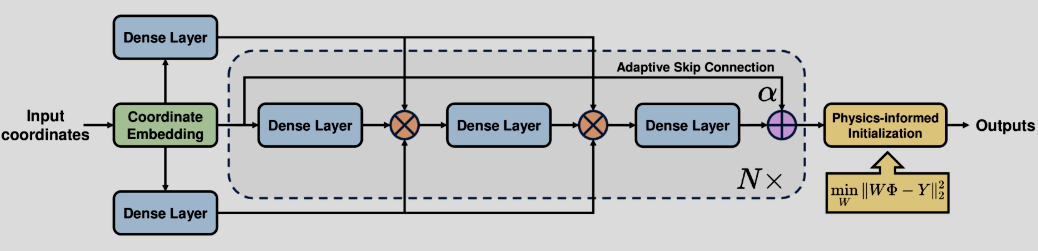

Source: https://arxiv.org/html/2402.00326v1
  
PirateNets: Physics-informed Deep Learning with Residual Adaptive Networks (Sifan Wang and Bowen Li and Yuhan Chen and Paris Perdikaris)
  



The following equations describe the computations inside a neural network, where each equation defines a transformation step at each layer:

1. **First Transformation (Activation of Input)**  
   This equation calculates the activation of the input to the layer by applying a linear transformation followed by an activation function (e.g., tanh or ReLU):

   $$
   f^{\left(l\right)} = \sigma\left(W_1^{\left(l\right)} x^{\left(l\right)} + b_1^{\left(l\right)}\right)
   $$

   - **$W_1^{(l)}$**: Weight matrix for the first transformation.
   - **$x^{(l)}$**: Input to the layer.
   - **$b_1^{(l)}$**: Bias term for the transformation.
   - **$\sigma$**: Activation function (e.g., tanh, ReLU).

2. **First Combination (Weighted Mixing)**  
   This step combines the result of the activation function with learnable parameters **$U$** and **$V$**, using an element-wise product (denoted as $\odot$):

   $$
   z_1^{\left(l\right)} = f^{\left(l\right)} \odot U + \left(1 - f^{\left(l\right)}\right) \odot V
   $$

   - **$U$ and $V$**: Learnable parameters that control the influence of the current activation and previous information.

3. **Second Transformation (Activation)**  
   This equation applies another linear transformation followed by an activation to the combined input **$z_1$**:

   $$
   g^{\left(l\right)} = \sigma\left(W_2^{\left(l\right)} z_1^{\left(l\right)} + b_2^{\left(l\right)}\right)
   $$

   - **$W_2^{(l)}$**: Weight matrix for the second transformation.
   - **$b_2^{(l)}$**: Bias term for the transformation.

4. **Second Combination (Weighted Mixing)**  
   Similar to the first combination, this step mixes the output from the previous transformation with **$U$** and **$V$**:

   $$
   z_2^{\left(l\right)} = g^{\left(l\right)} \odot U + \left(1 - g^{\left(l\right)}\right) \odot V
   $$

5. **Third Transformation (Activation)**  
   Another linear transformation followed by an activation function is applied to **$z_2$**:

   $$
   h^{\left(l\right)} = \sigma\left(W_3^{\left(l\right)} z_2^{\left(l\right)} + b_3^{\left(l\right)}\right)
   $$

6. **Skip Connection (Adaptive Combination)**  
   Finally, the output of this layer is calculated using an adaptive skip connection. The result **$h^{(l)}$** is combined with the input **$x^{(l)}$** using the learnable parameter **$\alpha$**:

   $$
   x^{\left(l+1\right)} = \alpha^{\left(l\right)} h^{\left(l\right)} + \left(1 - \alpha^{\left(l\right)}\right) x^{\left(l\right)}
   $$

   - **$\alpha^{(l)}$**: Learnable parameter controlling the amount of new information to retain from this layer.
   - This skip connection allows the model to gradually adjust how much of the previous layer's information is retained.

### Key Concepts:
- **$W$ and $b$**: Weight matrices and biases.
- **$U$ and $V$**: Learnable parameters for combining inputs.
- **$\sigma$**: Activation function, typically ReLU or tanh.
- **$\alpha$**: Adaptive skip connection parameter.

These equations define the transformation from one layer to the next, with the skip connection allowing the model to adaptively mix new and previous layer outputs. This approach is useful for building more flexible and deeper models that can learn complex patterns in the data.


In [41]:
# Define kinematic viscosity and density to compute the dynamic viscosity (nu)
kinematic_nu = 5e-6
density = 1 # ??
nu = kinematic_nu * density

def pde_loss(x, y, pred):
    u, v, p, uv, uu, vv = pred[:, 0:1], pred[:, 1:2], pred[:, 2:3], pred[:, 3:4], pred[:, 4:5], pred[:, 5:6]
#     u, v, p = pred[:, 0:1], pred[:, 1:2], pred[:, 2:3]
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0]
    u_y = torch.autograd.grad(u, y, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, y, grad_outputs=torch.ones_like(u_y), create_graph=True)[0]

    v_x = torch.autograd.grad(v, x, grad_outputs=torch.ones_like(v), create_graph=True)[0]
    v_xx = torch.autograd.grad(v_x, x, grad_outputs=torch.ones_like(v_x), create_graph=True)[0]
    v_y = torch.autograd.grad(v, y, grad_outputs=torch.ones_like(v), create_graph=True)[0]
    v_yy = torch.autograd.grad(v_y, y, grad_outputs=torch.ones_like(v_y), create_graph=True)[0]

    p_x = torch.autograd.grad(p, x, grad_outputs=torch.ones_like(p), create_graph=True)[0]
    p_y = torch.autograd.grad(p, y, grad_outputs=torch.ones_like(p), create_graph=True)[0]
    
    uv_x = torch.autograd.grad(uv, x, grad_outputs=torch.ones_like(uv), create_graph=True)[0]
    uv_y = torch.autograd.grad(uv, y, grad_outputs=torch.ones_like(uv), create_graph=True)[0]
    uu_x = torch.autograd.grad(uu, x, grad_outputs=torch.ones_like(uu), create_graph=True)[0]
    vv_y = torch.autograd.grad(vv, y, grad_outputs=torch.ones_like(vv), create_graph=True)[0]
    
    f =  u * u_x + v * u_y + p_x - nu * (u_xx + u_yy) + uu_x + uv_y
    g =  u * v_x + v * v_y + p_y - nu * (v_xx + v_yy) + uv_x + vv_y
    cont = u_x + v_y
    
    f_loss = (f ** 2).mean()
    g_loss = (g ** 2).mean()
    
    return f_loss + g_loss + (cont ** 2).mean()


#### Defining PirateNET model

In [42]:
class Net(nn.Module):
    def __init__(self, layer_dim):
        super().__init__()
        self.num_layers = len(layer_dim)
        self.layers = nn.ModuleList()  # Layer list initialization

        for i in range(1, self.num_layers):
            self.layers.append(nn.Linear(layer_dim[i-1], layer_dim[i]))  # Add linear layers

    def forward(self, x):
        for layer in self.layers:
            x = F.tanh(layer(x))  # Apply activation for each layer
        return self.layers[-1](x)  # Output layer

class PirateNetBlock(nn.Module):
    def __init__(self, hidden_dim):
        super(PirateNetBlock, self).__init__()
        self.dense1 = nn.Linear(hidden_dim, hidden_dim)  # First dense layer
        self.dense2 = nn.Linear(hidden_dim, hidden_dim)  # Second dense layer
        self.dense3 = nn.Linear(hidden_dim, hidden_dim)  # Third dense layer
        self.alpha = nn.Parameter(torch.zeros(1))  # Parameter alpha for blending

    def forward(self, x, u, v):
        f = F.tanh(self.dense1(x))  # Apply activation after first layer
        z1 = f * u + (1 - f) * v  # Blend with u and v
        g = F.tanh(self.dense2(z1))  # Apply activation after second layer
        z2 = g * u + (1 - g) * v  # Blend again with u and v
        h = F.tanh(self.dense3(z2))  # Apply activation after third layer
        return self.alpha * h + (1 - self.alpha) * x  # Final output after blending

class PirateNet(nn.Module):
    def __init__(self, input_dim, output_dim, num_blocks, hidden_dim=256, s=1.0, activation=F.tanh):
        super(PirateNet, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_blocks = num_blocks
        self.hidden_dim = hidden_dim
        self.s = s
        self.activation = activation

        # Embedding matrix B for feature transformation
        self.B = nn.Parameter(torch.randn(input_dim, hidden_dim // 2) * s)
        self.embedding = lambda x: torch.cat(
            [torch.cos(torch.matmul(x, self.B)), torch.sin(torch.matmul(x, self.B))], dim=-1
        )

        # List of PirateNetBlock layers
        self.blocks = nn.ModuleList([PirateNetBlock(hidden_dim) for _ in range(num_blocks)])
        self.U = nn.Linear(hidden_dim, hidden_dim)  # U layer for transformations
        self.V = nn.Linear(hidden_dim, hidden_dim)  # V layer for transformations
        
        # Final output layer
        self.final_layer = nn.Linear(hidden_dim, output_dim, bias=False)
        print(self.final_layer.weight.data.shape)  # Print weight shape for debugging

        self.initialize_weights()  # Initialize weights
       
    def initialize_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                torch.nn.init.xavier_uniform_(module.weight)  # Xavier initialization for weights
                if module.bias is not None:
                    module.bias.data.zero_()  # Initialize biases to zero

    def forward(self, x):
        x = self.embedding(x)  # Apply embedding transformation
        u = self.activation(self.U(x))  # Apply transformation for u
        v = self.activation(self.V(x))  # Apply transformation for v
        for block in self.blocks:
            x = block(x, u, v)  # Pass through blocks
        return self.final_layer(x)  # Return the final output

    def initialize_last_layer(self, Y, input_data):
        phi = self.embedding(input_data)  # Apply embedding to input data
        W = torch.linalg.lstsq(phi, Y).solution  # Solve for weights using least squares
        print(W.shape, self.final_layer.weight.data.shape)  # Debugging shapes
        self.final_layer.weight.data = W.T  # Set final layer weights to the solution


The purpose of the code block down below is to manage long training times and ensure that progress isn't lost. 

- **Save Checkpoints:** Since training deep learning models can take a long time, this code saves the model's and optimizer's state at regular intervals. If training is interrupted, it can resume from the last saved checkpoint.

- **Remove Old Checkpoints:** To save disk space, old model and optimizer checkpoints are automatically deleted, keeping only the most recent ones.

- **Pause and Resume Training:** The code also defines a maximum training time and a pause period to prevent overloading the system during long training sessions. If training is paused or stopped, it will resume from where it left off, using the latest checkpoint and logs.

This approach ensures efficient training, resource management, and recovery from interruptions without losing important data.


In [43]:
save_dir = "./model_saves"
os.makedirs(save_dir, exist_ok=True)

# Bekleme süresi ve çalışma süresi (saniye cinsinden)
max_train_time = 3600  # 3600 sec 60 dakika boyunca eğitim
pause_time = 600 # 600 sec 10 dakika bekleme
def cleanup_checkpoints(checkpoint_dir):
    """
    Removes all optimizer and model checkpoints except the latest one.

    :param checkpoint_dir: Directory where checkpoints are saved.
    """
    # Identify model and optimizer checkpoint files
    model_checkpoints = [
        f for f in os.listdir(checkpoint_dir)
        if f.startswith("model_checkpoint_iter_") and f.endswith(".pth")
    ]
    optimizer_checkpoints = [
        f for f in os.listdir(checkpoint_dir)
        if f.startswith("optimizer_checkpoint_iter_") and f.endswith(".pth")
    ]

    # Extract iterations from file names
    model_iterations = sorted(
        [int(f.split("_")[-1].split(".")[0]) for f in model_checkpoints]
    )
    optimizer_iterations = sorted(
        [int(f.split("_")[-1].split(".")[0]) for f in optimizer_checkpoints]
    )

    # Find the latest iteration
    latest_iteration = max(model_iterations + optimizer_iterations, default=None)

    # Delete all checkpoints except the latest one
    for iteration in model_iterations:
        if iteration != latest_iteration:
            model_path = os.path.join(checkpoint_dir, f"model_checkpoint_iter_{iteration}.pth")
            if os.path.exists(model_path):
                os.remove(model_path)
                print(f"Deleted old model checkpoint: {model_path}")

    for iteration in optimizer_iterations:
        if iteration != latest_iteration:
            optimizer_path = os.path.join(checkpoint_dir, f"optimizer_checkpoint_iter_{iteration}.pth")
            if os.path.exists(optimizer_path):
                os.remove(optimizer_path)
                print(f"Deleted old optimizer checkpoint: {optimizer_path}")

# Function to save logs to CSV
def save_logs_to_csv(logs, save_dir):
    logs_path = os.path.join(save_dir, "training_logs_latest.csv")
    logs_df = pd.DataFrame(logs)
    logs_df.to_csv(logs_path, index=False)
    #print(f"Logs saved at {logs_path}")

# Function to load model, optimizer, and iteration number
def load_checkpoint_and_logs(model, optimizer, checkpoint_dir):
    latest_iteration = 0
    logs = None
    logs_path = os.path.join(checkpoint_dir, "training_logs_latest.csv")

    # Search for the latest model checkpoint
    for file in os.listdir(checkpoint_dir):
        if file.startswith("model_checkpoint_iter_"):
            iteration = int(file.split("_")[-1].split(".")[0])
            if iteration > latest_iteration:
                latest_iteration = iteration

    if latest_iteration > 0:
        model_path = os.path.join(checkpoint_dir, f"model_checkpoint_iter_{latest_iteration}.pth")
        optimizer_path = os.path.join(checkpoint_dir, f"optimizer_checkpoint_iter_{latest_iteration}.pth")
        model.load_state_dict(torch.load(model_path, weights_only=True))  # Load weights only for the model
        optimizer.load_state_dict(torch.load(optimizer_path, weights_only=True))  # Load weights only for the optimizer
        print(f"Loaded checkpoint from iteration {latest_iteration}: {model_path}, {optimizer_path}")

        # Load existing logs if present
        if os.path.exists(logs_path):
            logs = pd.read_csv(logs_path).to_dict(orient="list")
            print("Existing logs loaded.")

    else:
        # Remove any residual logs if no checkpoint exists
        if os.path.exists(logs_path):
            os.remove(logs_path)
            print("No checkpoints found. Removed existing logs.")
        print("Starting from scratch.")

    # Initialize logs if none were loaded
    if logs is None:
        logs = {
            "iteration": [],
            "loss_from_pde": [],
            "loss_from_data": [],
            "total_loss": [],
        }

    return logs, latest_iteration


The `train_model` function manages the training loop by loading previous checkpoints and logs, allowing training to resume from the last saved state. In each iteration, it calculates the loss (from both data and PDE) and updates the model's parameters. It periodically saves logs, creates backups of the model and optimizer every 100 iterations, and saves checkpoints every 50 iterations. Older checkpoints are deleted to manage storage. The function also handles time limits, pausing training when the maximum training time is reached. If training is manually stopped, it ensures a clean exit.


In [44]:
# Training loop with saving model, optimizer, and logs
def train_model(model, optimizer, iterations, x_train, y_train, save_dir):
    logs, start_iteration = load_checkpoint_and_logs(model, optimizer, save_dir)

    def closure():
        x, y = x_train[:, 0:1], x_train[:, 1:2]
        x.requires_grad_(True)
        y.requires_grad_(True)
        input_tensor = torch.cat([x, y], dim=1)
        pred = model(input_tensor)

        optimizer.zero_grad()
        loss_from_data = F.mse_loss(pred, y_train)
        loss_from_pde = pde_loss(x, y, pred)  # Assuming pde_loss is defined
        loss = loss_from_pde + loss_from_data
        loss.backward()
        closure.iteration += 1

        logs["iteration"].append(closure.iteration)
        logs["loss_from_pde"].append(loss_from_pde.item())
        logs["loss_from_data"].append(loss_from_data.item())
        logs["total_loss"].append(loss.item())
        
        return loss

    closure.iteration = start_iteration  # Start from the latest iteration
    start_time = time.time()  # Başlangıç zamanını kaydet

    try:
        for iteration in range(start_iteration, iterations):
            current_time = time.time()  # Geçerli zamanı al
            elapsed_time = current_time - start_time  # Geçen süreyi hesapla

            if elapsed_time >= max_train_time:  # Eğer belirlenen süreyi aşarsa
                print(f"Maximum training time of {max_train_time} seconds reached. Pausing for {pause_time} seconds.")
                time.sleep(pause_time)  # Belirli bir süre bekle
                start_time = time.time()  # Zamanı sıfırla
        
            optimizer.step(closure)

            # Save logs every iteration
            save_logs_to_csv(logs, save_dir)
            if iteration % 100 == 0:
                # Backup model every 100 iteration
                model_path = os.path.join(save_dir, f"model_backup_iter_{iteration}.pth")
                optimizer_path = os.path.join(save_dir, f"optimizer_backup_iter_{iteration}.pth")
                torch.save(model.state_dict(), model_path)
                torch.save(optimizer.state_dict(), optimizer_path)
                print(f"Backup saved at {model_path} and {optimizer_path}")

            # Save latest checkpoints every 50 iterations
            if iteration % 50== 0:
                model_path = os.path.join(save_dir, f"model_checkpoint_iter_{iteration}.pth")
                optimizer_path = os.path.join(save_dir, f"optimizer_checkpoint_iter_{iteration}.pth")
                
                torch.save(model.state_dict(), model_path)
                torch.save(optimizer.state_dict(), optimizer_path)
                print(f"Checkpoint saved at {model_path} and {optimizer_path}")

                # Cleanup older checkpoints
                cleanup_checkpoints(save_dir)

    except KeyboardInterrupt:
        print("Training stopped manually.")
    return logs



In [45]:
import torch
from sklearn.preprocessing import StandardScaler

# Assuming device is set as follows (use GPU if available)
device = torch.device("cuda")

# Move x_train to the chosen device (CPU or GPU)
x_train = x_train.to(device)

# Standardize y_train on the CPU (StandardScaler works with NumPy, not tensors)
std_scaler = StandardScaler()

# Before applying StandardScaler, ensure y_train is on CPU if it's a tensor
if isinstance(y_train, torch.Tensor):
    y_train = y_train.cpu().numpy()  # Move to CPU and convert to numpy

y_train = std_scaler.fit_transform(y_train)

# Convert y_train back to a tensor and move it to the chosen device (GPU or CPU)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)


In [46]:
input_dim = 2
output_dim = 6
n_layers = 8
layer_dim = 256
model_architecrure = [input_dim] + n_layers * [layer_dim] + [output_dim]

# model = Net(model_architecrure).to(device)
model = PirateNet(
    input_dim=input_dim,
    output_dim=output_dim,
    num_blocks=n_layers,
    hidden_dim=layer_dim,
).to(device)
# model.initialize_last_layer(y_train, x_train)

torch.Size([6, 256])


In [47]:
save_dir = "./model_saves" 

In [48]:
lr = 0.01
iterations = 8050
optimizer = optim.Adam(model.parameters(), lr=lr)

In [49]:
logs = train_model(model, optimizer, iterations, x_train, y_train, save_dir)

Loaded checkpoint from iteration 8000: ./model_saves\model_checkpoint_iter_8000.pth, ./model_saves\optimizer_checkpoint_iter_8000.pth
Existing logs loaded.
Training stopped manually.


In [50]:
# Function to plot training logs
def plot_training_logs(logs):
    plt.figure(figsize=(10, 6))
    plt.plot(logs["iteration"], logs["loss_from_pde"], label="PDE Loss")
    plt.plot(logs["iteration"], logs["loss_from_data"], label="Data Conditions Loss")
    plt.plot(logs["iteration"], logs["total_loss"], label="Total Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.yscale("log")
    plt.title("Training Losses")
    plt.legend()
    plt.show()

In [51]:
model_logs = pd.read_csv("model_saves/training_logs_latest.csv")

In [52]:
loss_from_pde = model_logs["loss_from_pde"][7500:8000]
loss_from_data = model_logs["loss_from_data"][7500:8000]
total_loss = model_logs["total_loss"][7500:8000]

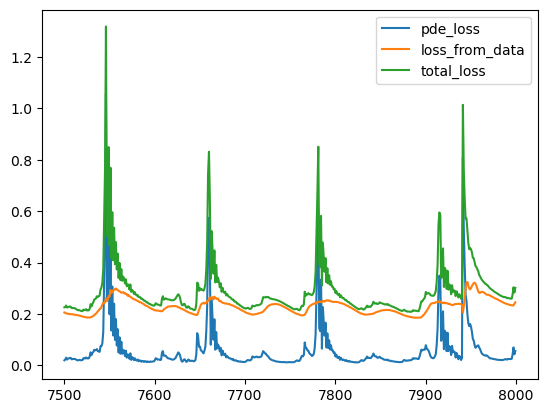

In [53]:
plt.plot(loss_from_pde,label = "pde_loss")
plt.plot(loss_from_data,label = "loss_from_data")
plt.plot(total_loss,label = "total_loss")
plt.legend()

In [54]:
def get_predictions(x, y, model):
    mesh = torch.tensor(np.stack((x, y), axis=1), dtype=torch.float32).to(device)
    preds = model(mesh)
    preds = std_scaler.inverse_transform(preds.detach().cpu().numpy())
    return (
        preds[:, 0],#.detach().cpu().numpy(),
        preds[:, 1],#.detach().cpu().numpy(),
        preds[:, 2],#.detach().cpu().numpy(),
        preds[:, 3],#.detach().cpu().numpy(),
        preds[:, 4],#.detach().cpu().numpy(),
        preds[:, 5],#.detach().cpu().numpy(),
    )

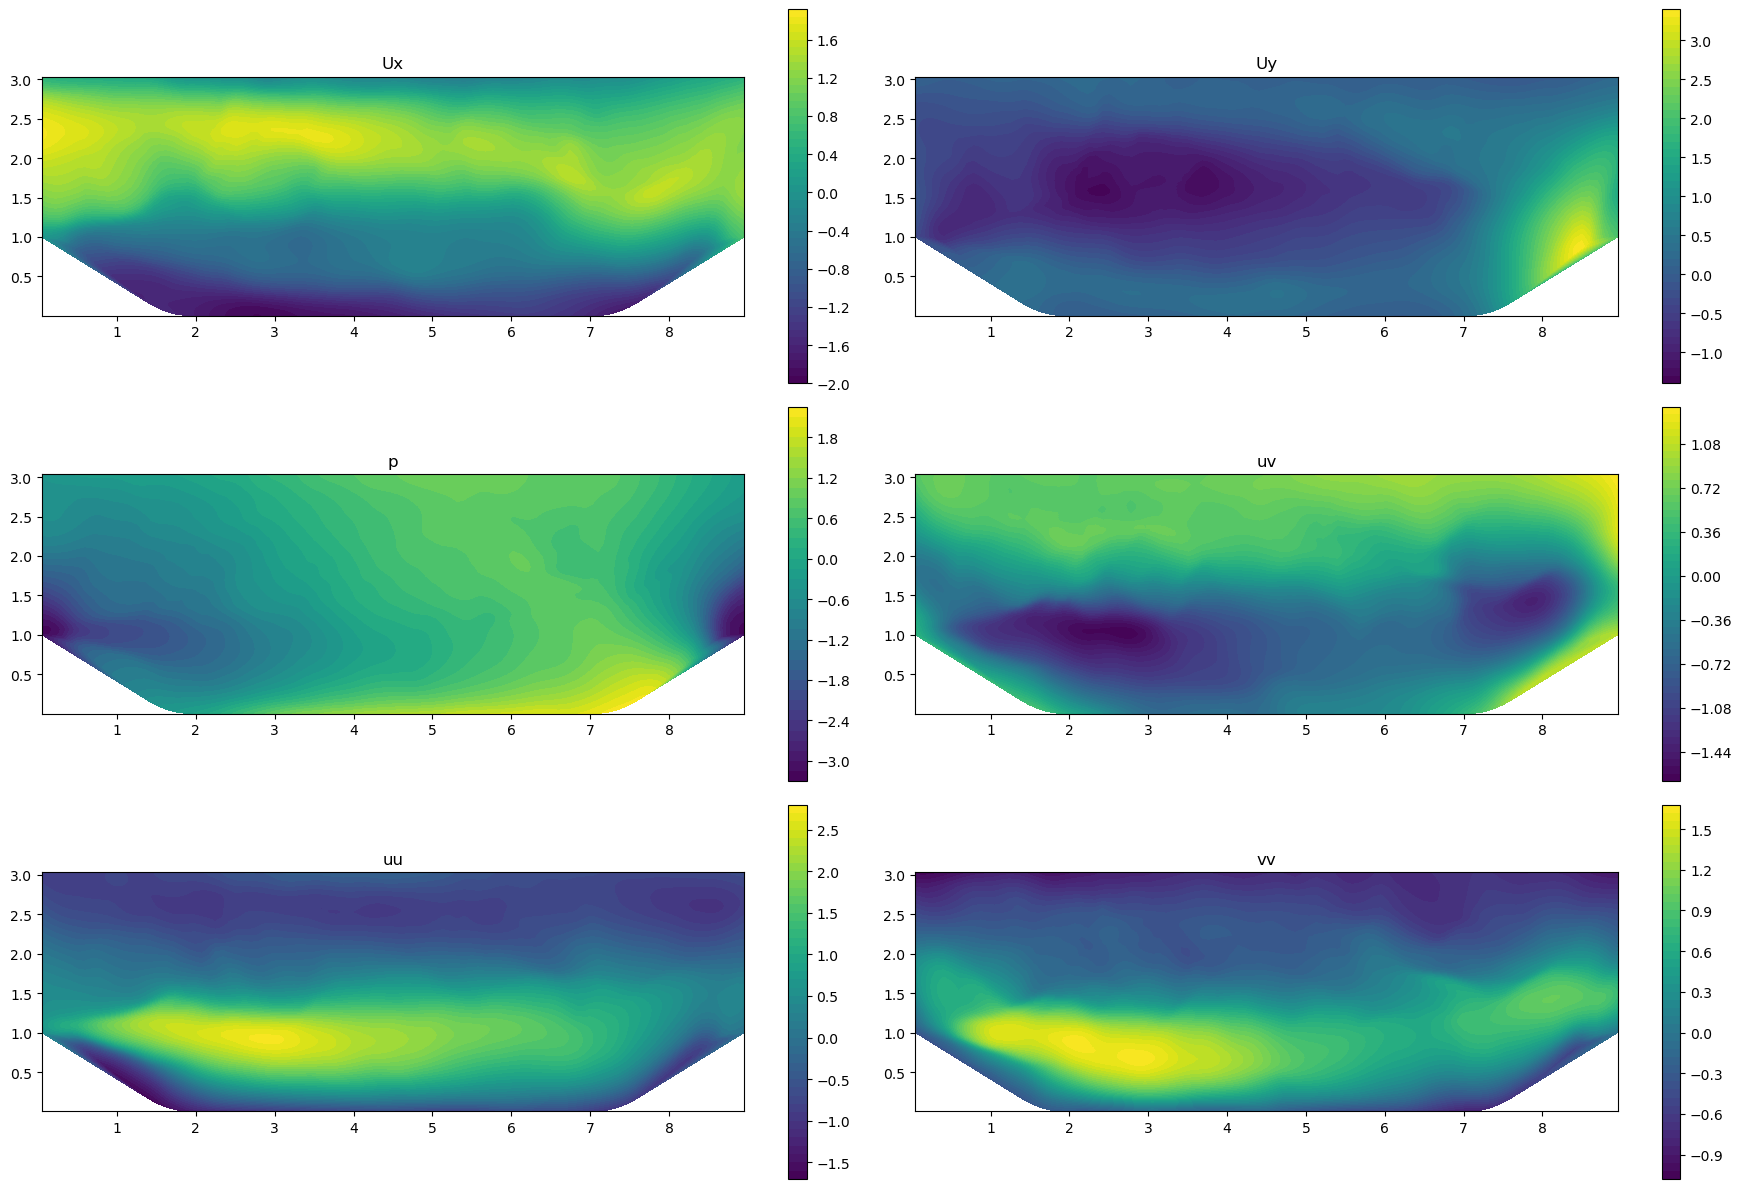

In [70]:
preds = get_predictions(x, y, model)

plot_flow_variables(x, y, *preds)


### Optimization of The Model (Hyperparameter Tuning with LBFGS)

In [56]:
new_optimized_save_dir = "./model_saves/optimized"

In [57]:
lr = 0.05
iterations = 1
optimizer = optim.LBFGS(
    model.parameters(),
    lr=lr,
    max_iter=100,
    max_eval=100,
    history_size=400,
    tolerance_grad=1e-11,
    tolerance_change=1e-14,
    line_search_fn="strong_wolfe",
)

In [58]:
logs = train_model(model, optimizer, iterations, x_train, y_train, new_optimized_save_dir)

No checkpoints found. Removed existing logs.
Starting from scratch.
Backup saved at ./model_saves/optimized\model_backup_iter_0.pth and ./model_saves/optimized\optimizer_backup_iter_0.pth
Checkpoint saved at ./model_saves/optimized\model_checkpoint_iter_0.pth and ./model_saves/optimized\optimizer_checkpoint_iter_0.pth


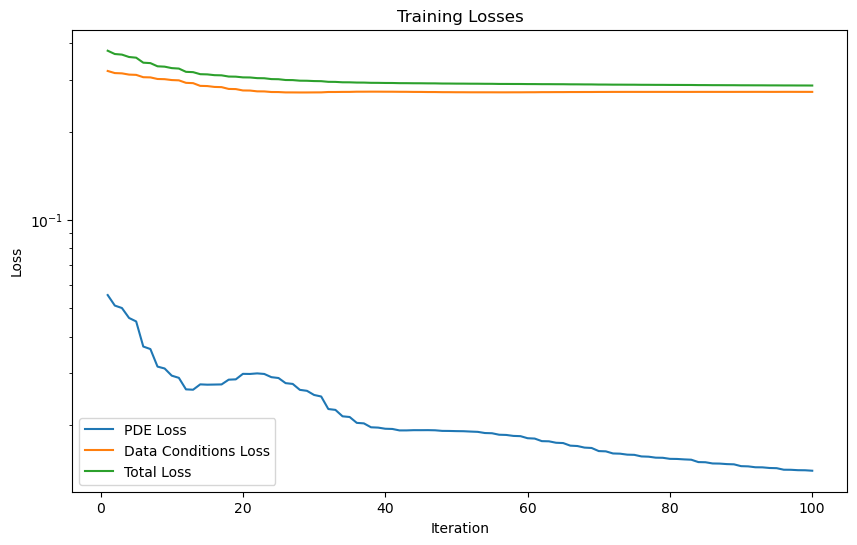

In [66]:
plot_training_logs(logs)

In [ ]:
preds = get_predictions(x, y, model)

plot_flow_variables(x, y, *preds)

### Calculating Losses

In [72]:
def relative_l2_error(u_predicted, u_exact):
    numerator = np.linalg.norm(u_predicted - u_exact, axis=1)
    denominator = np.linalg.norm(u_exact, axis=1)
    relative_error = numerator / denominator
    return relative_error

In [73]:
flow_absolute_errors = abs(flow_variables_arrays - np.stack(preds, axis=0))
flow_relative_errors = relative_l2_error(flow_variables_arrays, np.stack(preds, axis=0))

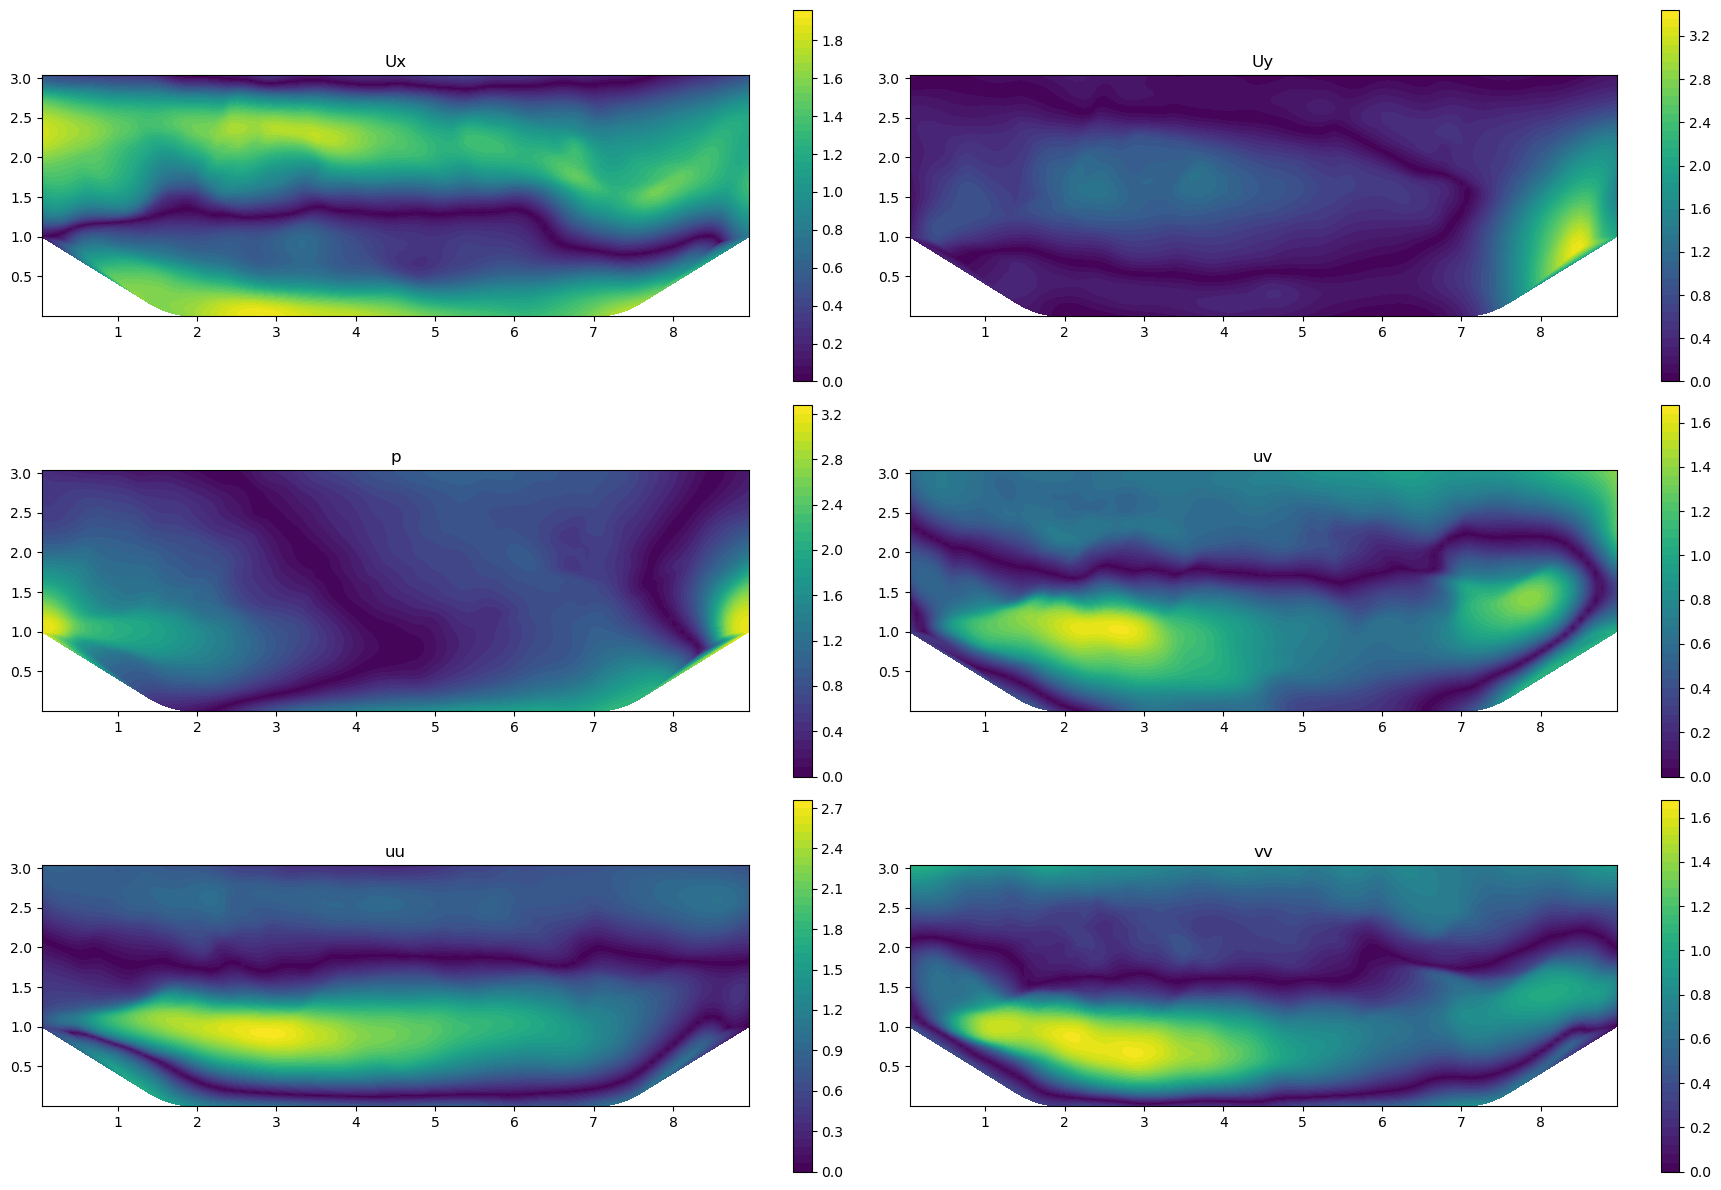

In [74]:
plot_flow_variables(x, y, *flow_absolute_errors)

In [63]:
import glob
import re


def extract_iteration_from_filename(filename):
    # Match the pattern 'iter_' followed by digits
    match = re.search(r'iter_(\d+)', filename)
    if match:
        return int(match.group(1))  # Return the numeric part
    else:
        raise ValueError(f"Iteration number not found in filename: {filename}")
        
# Function to extract numeric iteration from the filename
def extract_numeric_part(filename):
    # Match the pattern that captures the number after 'iter_'
    match = re.search(r'iter_(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # Return a large number if no match


# Get all optimizer backup files
model_save_folder = "./model_saves/"
optimizer_backup_files = sorted(glob.glob(f"{model_save_folder}/optimizer_backup_iter_*.pth"), key=lambda f: extract_numeric_part(f))

# Sort the model backup files by their numeric part, keeping the same order as optimizer
model_backup_files = [f.replace("optimizer", "model") for f in optimizer_backup_files]


In [64]:
import glob
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import re

# Assuming PirateNet is a model class you have defined elsewhere
# Define your model
model = PirateNet(
    input_dim=input_dim,
    output_dim=output_dim,
    num_blocks=n_layers,
    hidden_dim=layer_dim,
).to(device)

optimizer = torch.optim.Adam(model.parameters())  # Optimizer


# Function to load model and optimizer states from checkpoints in increasing order
def load_checkpoints_in_order(save_dir):
    # Get all optimizer backup files
    optimizer_backup_files = sorted(glob.glob(f"{save_dir}/optimizer_backup_iter_*.pth"), key=lambda f: extract_numeric_part(f))
    model_backup_files = [f.replace("optimizer", "model") for f in optimizer_backup_files]

    # Load model and optimizer from each backup in order
    for optimizer_file, model_file in zip(optimizer_backup_files, model_backup_files):
        print(f"Loading model from {model_file} and optimizer from {optimizer_file}")
        
        # Load optimizer and model state
        optimizer.load_state_dict(torch.load(optimizer_file))
        model.load_state_dict(torch.load(model_file))
  
        print(f"Loaded checkpoint: {model_file}, {optimizer_file}")

# Function to extract iteration number from filename
def extract_iteration_from_filename(filename):
    match = re.search(r'iter_(\d+)', filename)
    return int(match.group(1)) if match else None

# Function to save flow variables predictions as subplots (images)
def save_predictions_as_subplots(x, y, predictions, save_dir, optimizer_backup_files):
    # Get the number of frames from the predictions
    n_frames = len(predictions[0][0])  # Assuming predictions[i] is a tuple of 6 arrays
    
    # Define the number of variables (6)
    num_variables = 6
    
    variable_names = flow_variables + label_variables  # Update this list as needed

    # Iterate through all frames and save them as images
    for frame in range(min(n_frames, len(predictions))):  # Safeguard to avoid out-of-bounds errors
        # Create the plot
        fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for 6 variables
        ax = ax.flatten()  # Flatten the axes array to make indexing easier

        iteration_num = extract_iteration_from_filename(model_backup_files[frame])
        
        # Add a single title for the entire figure at the top-left
        fig.suptitle(f"Iteration: {iteration_num}", x=0.05, y=0.95, fontsize=16, ha='left', va='top')

        # Loop through each variable and plot in a subplot
        for i in range(num_variables):
            ax[i].cla()  # Clear the axis for each new plot
            
            # Get the corresponding prediction for this variable and frame
            variable = np.asarray(predictions[frame])[i]  # Ensure indexing is correct            
            ax[i].set_title(f"Prediction for variable {variable_names[i]}")
            contour = ax[i].tricontourf(x.flatten(), y.flatten(), variable.flatten(), levels=500)
            ax[i].set_aspect(1)
            
            # Add color bar
            plt.colorbar(contour, ax=ax[i])
        
        # Save the figure as an image
        image_filename = os.path.join(save_dir, f"prediction_iter_{frame:04d}.png")
        plt.savefig(image_filename)
        plt.close(fig)


# Function to create a time-lapse from saved images
def create_timelapse_from_images(save_dir):
    # Get all image filenames sorted by iteration number
    image_files = sorted(glob.glob(f"{save_dir}/prediction_iter_*.png"))
    
    # Create the time-lapse video using FuncAnimation
    fig, ax = plt.subplots(figsize=(10, 12))
    ims = []

    print("Hey",image_files)
    
    for image_file in image_files:
        img = plt.imread(image_file)
        im = ax.imshow(img)
        ims.append([im])
    
    
    ani = FuncAnimation(fig, lambda x: x, frames=ims, interval=1, repeat=True)
    output_file = os.path.join(save_dir, 'timelapse_flow_variables.mp4')
    
    try:
        ani.save(output_file, writer='ffmpeg', fps=1)
    except Exception as e:
        print(f"Error saving video with ffmpeg: {e}. Using Pillow instead.")
        ani.save(output_file, writer='pillow', fps=1)
    
    plt.show()

# Example function to run inference (prediction) and create a time-lapse
def run_inference_and_create_timelapse(x_train, y_train, save_dir):
    # Load all checkpoints from the specified directory in increasing order
    #load_checkpoints_in_order(save_dir)

    predictions = []  # List to store predictions for each checkpoint
    for optimizer_file, model_file in zip(optimizer_backup_files, model_backup_files):
        # Load model and optimizer state
        print(f"Loading checkpoint: {model_file}, {optimizer_file}")
        optimizer.load_state_dict(torch.load(optimizer_file,weights_only = True))
        model.load_state_dict(torch.load(model_file,weights_only = True))

        # Get predictions from the model after loading the checkpoint
        pred_1, pred_2, pred_3, pred_4, pred_5, pred_6 = get_predictions(x_train, y_train, model)
        predictions.append((pred_1, pred_2, pred_3, pred_4, pred_5, pred_6))


    
    save_predictions_as_subplots(x_train, y_train, predictions, save_dir,  [model_backup_files])

    # Create the time-lapse from the saved images after all predictions are made
    create_timelapse_from_images(save_dir)

# Example usage
save_dir = "./"
os.makedirs(save_dir, exist_ok=True)

torch.Size([6, 256])


In [1]:
#run_inference_and_create_timelapse(x_train,y_train,save_dir)